1. In order to predict house price based on several characteristics, such as location, square footage, number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?

Dataset link:https://drive.google.com/file/d/1Z9oLpmt6IDRNw7IeNcHYTGeJRYypRSC0/view?

usp=share_link

2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as  your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?

3. You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?

4. You have built an SVM regression model using a polynomial kernel and are trying to select the best metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?

5. You are comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most appropriate if your goal is to measure how well the model explains the variance in the target variable?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for visualization
import plotly.express as px # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

### Data Preprocessing

In [7]:
print('Checking for Null values in the dataframe:','\n',df.isnull().sum(),'\n')

Checking for Null values in the dataframe: 
 area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64 



In [8]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

5.172672672672673


In [9]:
skewness = df['bath'].skew()
print("Skewness:", skewness) ## This data is right skewed

Skewness: 4.227696763299001


In [10]:
skewness = df['balcony'].skew()
print("Skewness:", skewness) ## This Data is normally distributed

Skewness: 0.005856767469113565


In [11]:
df['balcony'].fillna(df['balcony'].median(), inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)

In [12]:
mode_value = df['location'].mode()[0]
df['location'].fillna(mode_value, inplace=True)

In [13]:
mode_value = df['size'].mode()[0]
df['size'].fillna(mode_value, inplace=True)

In [14]:
mode_value = df['society'].mode()[0]
df['society'].fillna(mode_value, inplace=True)

print('Checking for Null values in the dataframe:','\n',df.isnull().sum(),'\n')

### Now our Data is clear

In [15]:
df.describe()

,bath,balcony,price
count,13320.000000,13320.000000,13320.000000
mean,2.688814,1.603378,112.565627
std,1.338754,0.803067,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


* The average number of bathrooms in the properties is approximately 2.69, indicating that most properties have around 2-3 bathrooms.

* The average number of balconies in the properties is approximately 1.60, suggesting that the majority of properties have either 1 or 2 balconies.

* The average price of the properties is approximately 112.57.

* There is a significant variation in property prices, as indicated by the relatively high standard deviation of approximately 148.97.

* The minimum number of bathrooms is 1, while the maximum is 40. The minimum and maximum values for balconies are 0 and 3, respectively.

* The property prices range from a minimum of 8 to a maximum of 3600.

In [16]:
print(pd.Categorical(df['total_sqft']))

['1056', '2600', '1440', '1521', '1200', ..., '3453', '3600', '1141', '4689', '550']
Length: 13320
Categories (2117, object): ['1', '1.25Acres', '1.26Acres', '1000', ..., '996', '997', '998', '999']


In [17]:
df[df.dtypes[df.dtypes == 'object'].index].describe()

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13320,13320,13320,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,541,5215,5582,843


* The dataset includes information on housing properties with features such as the area type, availability, location, size, society, and total square footage.

* There are four unique categories in the "area_type" column. The most common area type is "Super built-up Area," which appears 8,790 times in the dataset.

* The "availability" column indicates the status of the properties. The most frequent value is "Ready To Move," occurring 10,581 times.

* The "location" column contains 1,305 unique locations. The top location in the dataset is "Whitefield," appearing 541 times.

* The "size" column represents the size or number of rooms in the properties. The most common size is "2 BHK" (2 bedrooms, hall, and kitchen), occurring 5,215 times.

* The "society" column contains 2,688 unique values, with the most frequent one being "GrrvaGr," appearing 5,582 times.

* The "total_sqft" column represents the total square footage of the properties. The most common value is "1200," which appears 843 times.

### Checking Outliers

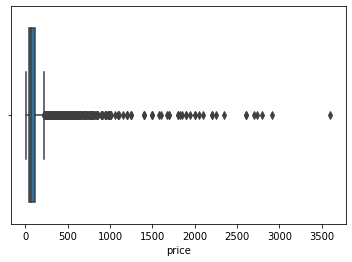

In [18]:
sns.boxplot(df['price']);

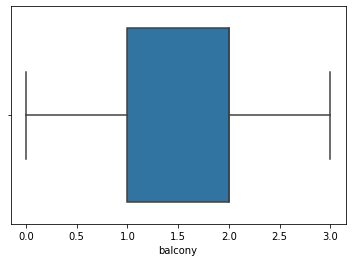

In [19]:
sns.boxplot(df['balcony']);

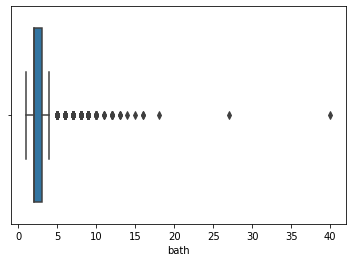

In [20]:
sns.boxplot(df['bath']);

In [21]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,GrrvaGr,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [22]:
for col in df.select_dtypes([float, int]).columns :
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    h=q3+1.5*iqr
    print("[",l,",",h,"]")
    df = df[(df[col] <= h)] 
    df = df[(df[col] >=l)]

[ 0.5 , 4.5 ]
[ -0.5 , 3.5 ]
[ -37.5 , 190.5 ]


In [23]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,GrrvaGr,1262,2.0,2.0,47.00
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


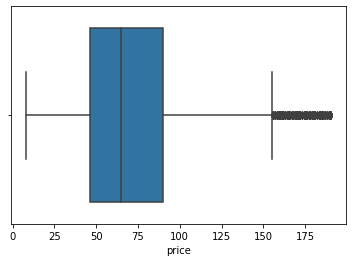

In [24]:
sns.boxplot(df['price']);

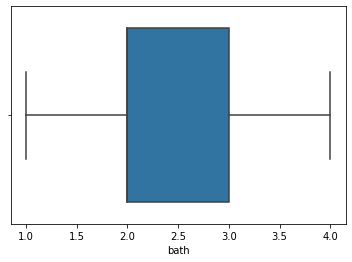

In [25]:
sns.boxplot(df['bath']);

In [26]:
## Lets go ahead and explore more data
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['bath', 'balcony', 'price']

We have 6 categorical features : ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']


In [28]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [31]:
print(df['availability'] .value_counts())
print("\n")
print(pd.Categorical(df['availability']))

availability
Ready To Move    8767
18-May            267
18-Dec            260
18-Apr            242
18-Aug            193
                 ... 
20-Feb              1
15-Oct              1
16-Sep              1
20-May              1
14-Jul              1
Name: count, Length: 81, dtype: int64


['19-Dec', 'Ready To Move', 'Ready To Move', 'Ready To Move', 'Ready To Move', ..., 'Ready To Move', 'Ready To Move', 'Ready To Move', 'Ready To Move', 'Ready To Move']
Length: 11213
Categories (81, object): ['14-Jul', '14-Nov', '15-Aug', '15-Dec', ..., '22-May', '22-Nov', 'Immediate Possession', 'Ready To Move']


In [33]:
print(df['location'] .value_counts())
print("\n")
print(pd.Categorical(df['location']))

location
Whitefield             435
Sarjapur  Road         338
Electronic City        297
Kanakpura Road         267
Thanisandra            225
                      ... 
rr nagar                 1
T K Reddy Layout         1
8th Block Jayanagar      1
Gandhi Nagar             1
Abshot Layout            1
Name: count, Length: 1134, dtype: int64


['Electronic City Phase II', 'Uttarahalli', 'Lingadheeranahalli', 'Kothanur', 'Whitefield', ..., 'Bellandur', 'Uttarahalli', 'Green Glen Layout', 'Raja Rajeshwari Nagar', 'Doddathoguru']
Length: 11213
Categories (1134, object): [' Anekal', ' Banaswadi', ' Basavangudi', ' Bhoganhalli', ..., 'sapthagiri Layout', 'singapura paradise', 'tc.palya', 'whitefiled']


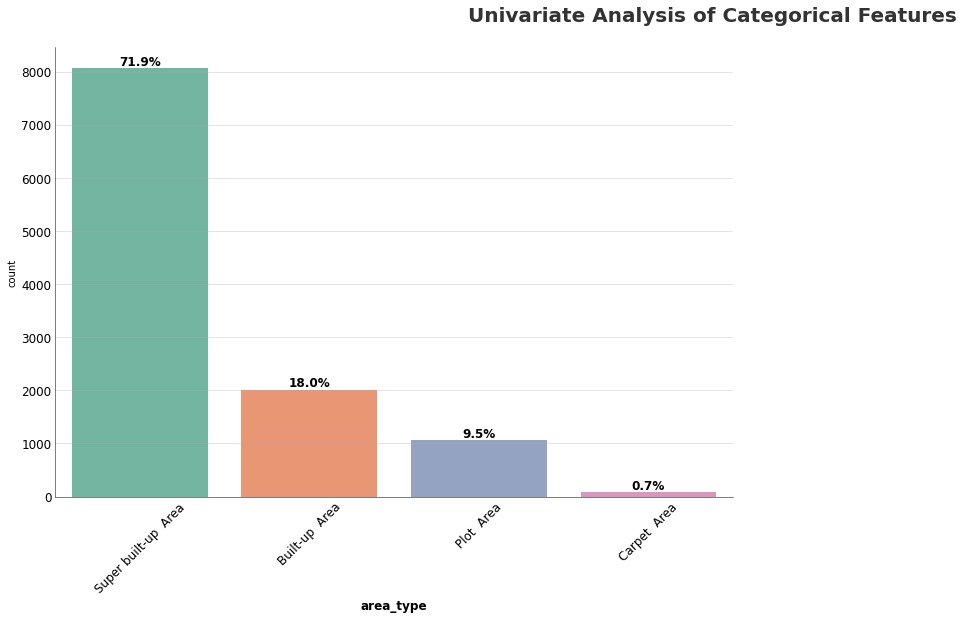

In [35]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['area_type']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=df[category[i]], palette='Set2')
    plt.xlabel(category[i], fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    # add percentage text to each bar
    total = len(df[category[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')
    # beautify plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.tick_params(axis='both', length=0)
    ax.grid(axis='y', linestyle='-', alpha=0.4)

### Feature Encoding

In [39]:
y = df.price
x = df.drop(columns = ['price'])

In [40]:
x

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,GrrvaGr,1262,2.0,2.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0


In [41]:
# Let's perform categorical features encoding:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [42]:
# Ind_features Encoding:
for feature in x.select_dtypes([object, bool]).columns:
    x[feature]= LE.fit_transform(x[feature])

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming you have your feature matrix X and target variable y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the SVM regression model
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

__Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as
your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price
of a house as accurately as possible?__

__Ans)__ If your goal is to predict the actual price of a house as accurately as possible, the more appropriate evaluation metric would be the Mean Squared Error (MSE).

MSE measures the average squared difference between the predicted and actual values. By minimizing the MSE, you are effectively minimizing the average prediction error and aiming for the smallest possible differences between the predicted and actual prices. This metric provides a direct measure of the accuracy of your predictions in terms of the squared differences.

On the other hand, R-squared measures the proportion of the variance in the dependent variable that can be explained by the independent variables. While R-squared is a useful metric for assessing the overall goodness of fit of the model, it may not directly reflect the accuracy of individual predictions. R-squared is more concerned with the explanatory power of the model rather than the specific prediction accuracy.

Therefore, in this case, MSE would be the more appropriate metric to evaluate and compare the SVM regression models for predicting the actual price of a house

__Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate
regression metric to use with your SVM model. Which metric would be the most appropriate in this
scenario?__

__Ans)__ When dealing with a dataset that has a significant number of outliers, the most appropriate regression metric to use with an SVM model would be a robust regression metric such as the Mean Absolute Error (MAE) or the Median Absolute Error (MedAE).

Unlike the Mean Squared Error (MSE) or R-squared, which are sensitive to outliers and can be heavily influenced by their presence, robust regression metrics provide a more resistant measure of the model's performance in the presence of outliers. These metrics are based on absolute differences instead of squared differences, making them less sensitive to extreme values.

The Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It provides a robust measure of the average prediction error and is not affected by outliers as heavily as MSE.

The Median Absolute Error (MedAE) is similar to MAE but instead of taking the mean, it calculates the median of the absolute differences. The median is a robust measure that is not influenced by outliers, making MedAE even more resistant to the presence of outliers.

In summary, when dealing with a dataset that has a significant number of outliers, it is recommended to use robust regression metrics such as MAE or MedAE to evaluate the performance of an SVM regression model. These metrics provide a more reliable assessment of the model's predictive accuracy in the presence of outliers.

__Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best
metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values
are very close. Which metric should you choose to use in this case?__

__Ans)__f you have built an SVM regression model using a polynomial kernel and both the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values are very close, it is generally recommended to use RMSE as the evaluation metric.

RMSE is a more interpretable metric compared to MSE because it is in the same unit as the target variable. It represents the average magnitude of the prediction errors in the original scale of the target variable. By taking the square root of MSE, RMSE provides a measure of the typical prediction error in the same units as the target variable, which makes it easier to interpret and compare with the actual values.

Using RMSE can help provide a better understanding of the model's performance in terms of the average deviation from the actual values. It is particularly useful when the scale of the target variable is meaningful and you want to assess the model's performance in that context.

Therefore, in the given scenario where both MSE and RMSE are very close, choosing RMSE as the evaluation metric would be a reasonable choice.

__Q5. You are comparing the performance of different SVM regression models using different kernels (linear,
polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most
appropriate if your goal is to measure how well the model explains the variance in the target variable?__

__Ans)__  
If the goal is to measure how well the model explains the variance in the target variable, the most appropriate evaluation metric to use for comparing the performance of different SVM regression models with different kernels (linear, polynomial, and RBF) is the coefficient of determination, also known as R-squared.

R-squared measures the proportion of the variance in the dependent variable (target variable) that is explained by the independent variables (features) in the model. It provides an indication of how well the model fits the data and how much of the variation in the target variable can be attributed to the predictors.

R-squared ranges from 0 to 1, where 0 indicates that the model explains none of the variance in the target variable, and 1 indicates that the model explains all the variance. Higher values of R-squared indicate a better fit and a higher degree of explained variance.